In [13]:
#from parse_kd import *
import re
import pandas as pd
import numpy as np
from chunk_utils import *
import matplotlib
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from pyclustering.cluster.xmeans import xmeans
data_dir = './data/dw_freetext/'

In [2]:
%load_ext autoreload
%autoreload 2
matplotlib.rcParams['figure.figsize'] = 8,5

In [3]:
df = pd.read_csv(data_dir+'GunControl_400.csv', delimiter='\t', usecols=[0,6,10])
df_filtered = df[df['Task']=='Copy_2']
# "Copy_2" column = when they're stating true opinion, repeating (transcribing) the essay already written
df_filtered.head(7)

,UserName,Task,ReviewMeta
1,A10E8QHPV30BAD,Copy_2,0 MouseUp 0 0;874 KeyDown 16;946 KeyDown 73;10...
5,A11T1LGIWPM9Z1,Copy_2,0 MouseUp 0 0;784 KeyDown 16;863 KeyDown 84;92...
9,A145PJ769UGAID,Copy_2,0 MouseUp 0 0;1517 KeyDown 16;1517 KeyDown 87;...
13,A161NZP385W1TX,Copy_2,0 MouseUp 0 0;1621 KeyDown 16;1734 KeyDown 84;...
17,A168RQT8B18FH,Copy_2,0 MouseUp 0 0;2112 KeyDown 16;2311 KeyDown 73;...
21,A16HFBY06FP1RJ,Copy_2,0 MouseUp 0 0;317 KeyDown 16;543 KeyDown 71;62...
25,A191P01GHJRPWO,Copy_2,0 MouseUp 0 0;7007 KeyDown 16;7018 KeyDown 73;...


In [11]:
phrases = ["criminal", "constitution", "amendment", "fundamental", "right", "gun", "control", 
           "safe", "citizen", "kill", "violence", "strongly", "think", "feel", 
           "legal", "reason", "fear", "oppose", "government", "power", 
           "freedom", "people"
          ]

# dict of dicts -- examining at user level
userwise_delays = {}
# dict of lists --- examining at population level (throwing away user information)
phrasewise_delays = {x:[] for x in phrases}

for textIndex in range(df_filtered.shape[0]):
#for textIndex in range(100,130):    
    rawkd = df_filtered['ReviewMeta'].iloc[textIndex]
    uid = df_filtered['UserName'].iloc[textIndex]
    userwise_delays[uid] = {}
    
    for phrase in phrases:
        phrase_keys = get_phrases_from_rawkd(rawkd, phrase)    
        all_delays = [keypress2delays(phrase, keys) for keys in phrase_keys]
        userwise_delays[uid][phrase] = all_delays
        phrasewise_delays[phrase].extend(all_delays)

In [12]:
for phrase in phrasewise_delays:
    print ("{} : {}".format(phrase, len(phrasewise_delays[phrase])))

criminal : 198
constitution : 98
amendment : 72
fundamental : 4
right : 438
gun : 1979
control : 544
safe : 155
citizen : 202
kill : 196
violence : 115
strongly : 8
think : 82
feel : 49
legal : 110
reason : 71
fear : 15
oppose : 38
government : 145
power : 47
freedom : 64
people : 572


In [64]:
word_of_interest = 'criminal'
label = list(map(lambda x: x[0]+x[1], zip(word_of_interest, word_of_interest[1:])))

delay_sample_raw = np.array(phrasewise_delays[word_of_interest])
delay_sample_cumul = np.array([np.cumsum(x) for x in delay_sample_raw])

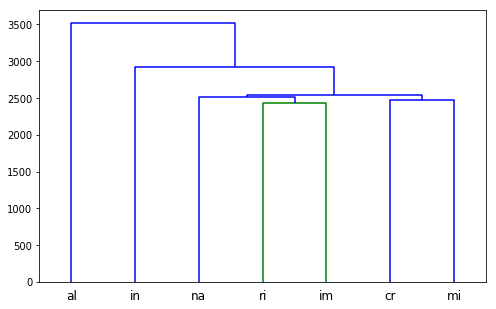

In [65]:
dn = hc.dendrogram(hc.linkage(delay_sample_raw.transpose(), optimal_ordering=True), labels=label)

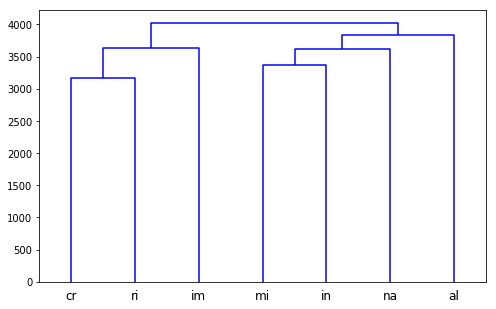

In [66]:
dn = hc.dendrogram(hc.linkage(delay_sample_cumul.transpose(), optimal_ordering=True), labels=label)

### xmeans clustering over population

In [71]:
# print number of samples in each discovered cluster
for word_of_interest in phrases:
    delay_sample_raw = np.array(phrasewise_delays[word_of_interest])
    delay_sample_cumul = np.array([np.cumsum(x) for x in delay_sample_raw])
    
    clus = xmeans(delay_sample_cumul)
    clus.process()
    clusterids = clus.get_clusters()
    print (word_of_interest)
    lens = [len(x) for x in clusterids]
    print (lens)
        

criminal
[35, 14, 44, 32, 1, 8, 35, 11, 18]
constitution
[23, 18, 19, 1, 23, 11, 1, 1, 1]
amendment
[10, 15, 24, 18, 5]
fundamental
[3, 1]
right
[96, 85, 58, 65, 47, 1, 30, 4, 33, 8, 10, 1]
gun
[1150, 627, 160, 36, 5, 1]
control
[326, 1, 1, 1, 135, 20, 60]
safe
[57, 27, 36, 1, 1, 24, 6, 1, 1, 1]
citizen
[51, 28, 16, 38, 35, 22, 10, 1, 1]
kill
[53, 58, 61, 17, 7]
violence
[53, 38, 4, 18, 1, 1]
strongly
[3, 1, 1, 3]
think
[15, 26, 20, 17, 4]
feel
[18, 24, 1, 6]
legal
[10, 6, 1, 22, 16, 32, 23]
reason
[18, 12, 24, 11, 4, 1, 1]
fear
[15]
oppose
[25, 9, 1, 1, 1, 1]
government
[27, 30, 22, 12, 1, 1, 1, 1, 17, 15, 12, 1, 5]
power
[9, 14, 1, 4, 15, 3, 1]
freedom
[31, 15, 14, 3, 1]
people
[39, 63, 18, 85, 117, 96, 8, 80, 1, 18, 32, 1, 13, 1]
